In [190]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
import scipy.optimize as sco

In [191]:
stocks = ['AAPL', 'EXPE', 'COF', 'AGN', 'BSX', 'WFC', 'ABT']

In [192]:
noa = len(stocks)

In [193]:
start_date = '01/01/2010'
end_date = '22/03/2019'

In [194]:
data = web.DataReader(stocks, data_source='yahoo', start=start_date, end=end_date)['Adj Close']

In [195]:
daily_returns = np.log(data/data.shift(1))

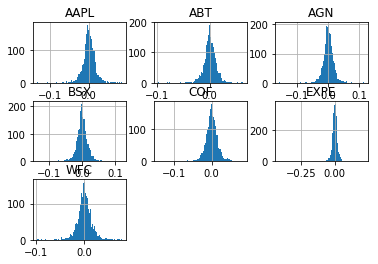

In [196]:
daily_returns.hist(bins=100);

In [311]:
#downloading data from YH
def download_data(stocks):
    data = web.DataReader(stocks, data_source='yahoo', start=start_date, end=end_date)['Adj Close']
    return data

In [312]:
def show_data(data):
    data.plot(figsize=(10,5));

In [313]:
#daily returns with natural logarithm to normalise
def calculate_returns(data):
    returns = np.log(data/data.shift(1))
    return returns

In [314]:
def plot_daily_returns(returns):
    returns.plot(figsize=(10,5))

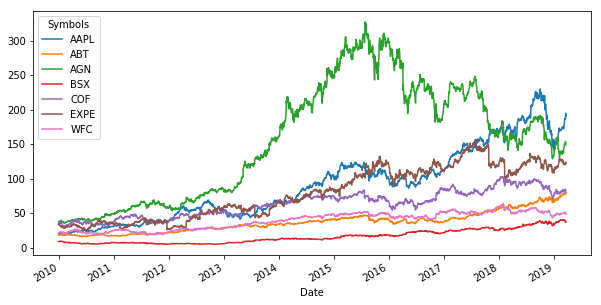

In [315]:
data.plot(figsize=(10,5))

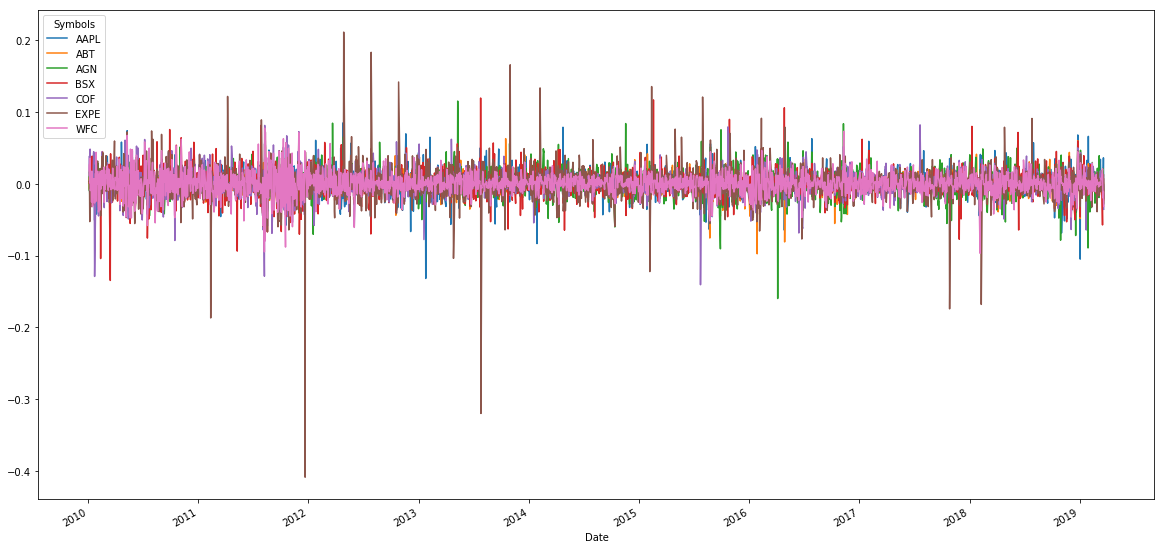

In [316]:
daily_returns.plot(figsize=(20,10))

In [317]:
#print mean and covarriance
def show_statistics(returns):
    print(returns.mean()*252)
    print(returns.cov()*252)

In [318]:
def initialize_weights():
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    return weights

In [319]:
#exp port return
def calculate_portfolio_return(returns, weights):
    portfolio_return_unrounded = np.sum(returns.mean()*weights)*252
    portfolio_return = round(portfolio_return_unrounded,2)
    print('Expected portfolio returns:  ', portfolio_return)

In [320]:
#exp port varaice
def calculate_portfolio_variance(returns, weights):
    portfolio_variance_unrounded = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    portfolio_variance = round(portfolio_variance_unrounded,2)
    print('Expected variance: ', portfolio_variance)

In [321]:
show_statistics(calculate_returns(data))

Symbols
AAPL    0.244736
ABT     0.157054
AGN     0.149451
BSX     0.154433
COF     0.095309
EXPE    0.136192
WFC     0.088316
dtype: float64
Symbols      AAPL       ABT       AGN       BSX       COF      EXPE       WFC
Symbols                                                                      
AAPL     0.068311  0.016552  0.017183  0.022965  0.026939  0.024454  0.022869
ABT      0.016552  0.035200  0.019062  0.024760  0.020946  0.018027  0.020081
AGN      0.017183  0.019062  0.072927  0.026051  0.023618  0.021719  0.020139
BSX      0.022965  0.024760  0.026051  0.083978  0.027701  0.028579  0.026770
COF      0.026939  0.020946  0.023618  0.027701  0.075640  0.031350  0.046906
EXPE     0.024454  0.018027  0.021719  0.028579  0.031350  0.149095  0.026227
WFC      0.022869  0.020081  0.020139  0.026770  0.046906  0.026227  0.059292


In [322]:
port_weights = initialize_weights()

In [323]:
calculate_portfolio_return(calculate_returns(data), port_weights)

Expected portfolio returns:   0.16


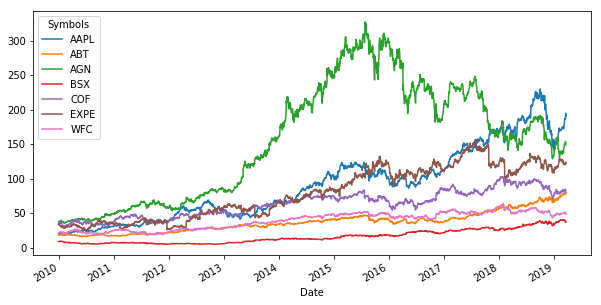

In [324]:
show_data(data)

In [325]:
calculate_portfolio_variance(calculate_returns(data), port_weights)

Expected variance:  0.19


In [347]:


def generate_portfolio(weights, returns):
    preturns = []
    pvariances = []
    
    #monte carlo simulation: generate several random weights--> i.e. random portfolios
    for i in range(10000):
        weights = np.random.random(noa)
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights))))
        
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns, pvariances
    

In [348]:
generate_portfolio(port_weights, calculate_returns(data))

(array([0.15119926, 0.14284242, 0.14250561, ..., 0.15634896, 0.13943745,
        0.12975303]),
 array([0.20194167, 0.18282989, 0.1814345 , ..., 0.17900629, 0.18269447,
        0.18398731]))

In [328]:
def plot_portfolios(returns, variances):
    plt.figure(figsize=(20,10))
    plt.scatter(variances, returns, c=returns/variances, marker= 'o')
    plt.grid(True)
    plt.xlabel("Expected Volatility")
    plt.ylabel("Expected Return")
    plt.colorbar(label = "sharpe Ratio")
    plt.show()

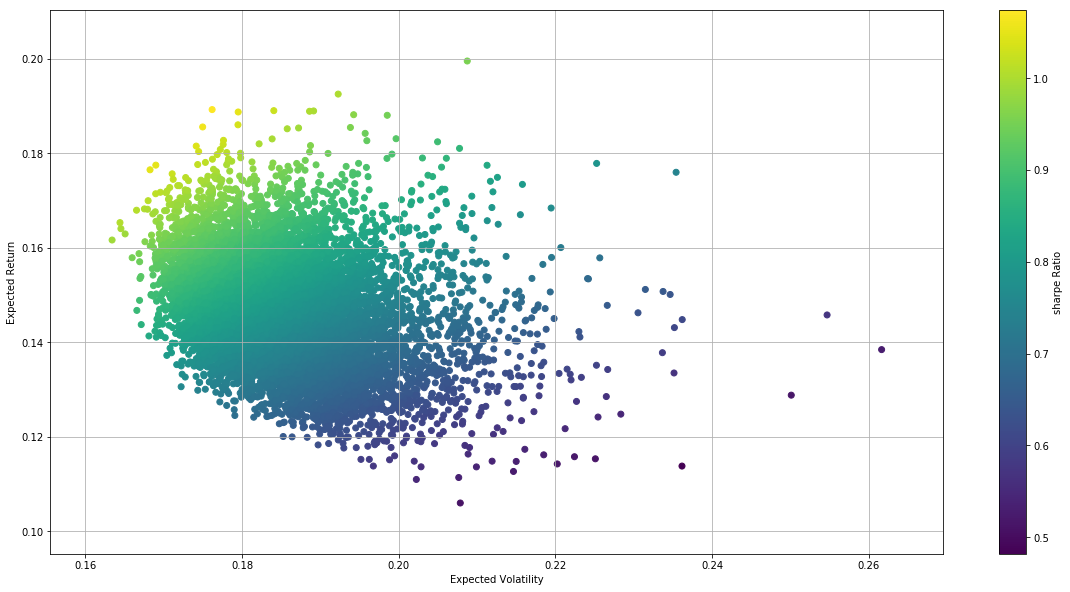

In [329]:
plot_portfolios(preturns, pvariances)

In [330]:
def statistics(weights, returns):
    weights = np.array(weights)
    portforlio_return= np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    return np.array([portforlio_return,portfolio_volatility, portforlio_return/portfolio_volatility])

In [331]:
statistics(port_weights, calculate_returns(data))

array([0.15835875, 0.19245046, 0.82285464])

In [332]:
#optimizing to sharpe ratio
def min_func_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

In [333]:
min_func_sharpe(port_weights, calculate_returns(data))

-0.8228546424218108

In [334]:
def optimize_portfolio(weights, returns):
    constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    bounds = tuple((0,1) for x in range(len(stocks)))
    optimum = sco.minimize(fun=min_func_sharpe, x0= weights, args=returns, method = 'SLSQP', bounds=bounds, constraints=constraints)
    return optimum

In [335]:
optimize_portfolio(port_weights, calculate_returns(data))

     fun: -1.1005497284234018
     jac: array([-1.66743994e-04,  1.20922923e-04,  1.96099281e-04, -2.10449100e-04,
        3.05669636e-01,  1.40428543e-04,  2.55164057e-01])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([4.35521530e-01, 4.44636900e-01, 1.04965438e-01, 1.08564262e-02,
       2.85687272e-17, 4.01970573e-03, 0.00000000e+00])

In [336]:
#optimal portfolio to weights:
def print_optimal_portfolio(optimum, returns):
    print("Optimal Portfolio weights: ", optimum['x'].round(3))
    print("Optimal Portfolio Exp Returns, Volatility & and Sharpe ratio: ", statistics(optimum['x'].round(3), returns))
    
    

In [337]:
print_optimal_portfolio(optimize_portfolio(port_weights, calculate_returns(data)), calculate_returns(data))

Optimal Portfolio weights:  [0.436 0.445 0.105 0.011 0.    0.004 0.   ]
Optimal Portfolio Exp Returns, Volatility & and Sharpe ratio:  [0.19453006 0.17675717 1.10054977]


In [338]:
def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(20,12))
    plt.scatter(pvariances,preturns, c=preturns/pvariances, marker = 'o')
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Returns')
    plt.colorbar(label= 'Sharpe Ratio')
    plt.plot(statistics(optimum['x'],returns)[1], statistics(optimum['x'],returns)[0], 'g*', markersize=20.0)
    plt.show()

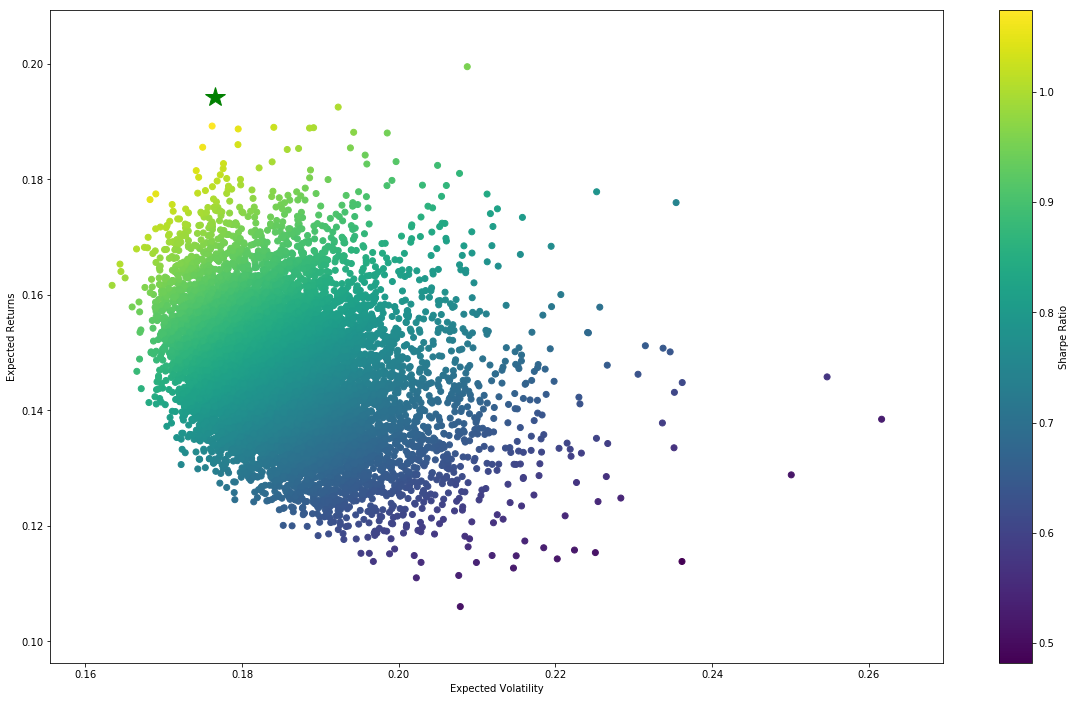

In [339]:
show_optimal_portfolio(optimize_portfolio(port_weights, calculate_returns(data)), calculate_returns(data), preturns, pvariances)

Symbols
AAPL    0.244736
ABT     0.157054
AGN     0.149451
BSX     0.154433
COF     0.095309
EXPE    0.136192
WFC     0.088316
dtype: float64
Symbols      AAPL       ABT       AGN       BSX       COF      EXPE       WFC
Symbols                                                                      
AAPL     0.068311  0.016552  0.017183  0.022965  0.026939  0.024454  0.022869
ABT      0.016552  0.035200  0.019062  0.024760  0.020946  0.018027  0.020081
AGN      0.017183  0.019062  0.072927  0.026051  0.023618  0.021719  0.020139
BSX      0.022965  0.024760  0.026051  0.083978  0.027701  0.028579  0.026770
COF      0.026939  0.020946  0.023618  0.027701  0.075640  0.031350  0.046906
EXPE     0.024454  0.018027  0.021719  0.028579  0.031350  0.149095  0.026227
WFC      0.022869  0.020081  0.020139  0.026770  0.046906  0.026227  0.059292
Expected portfolio returns:   0.15
Expected variance:  0.18


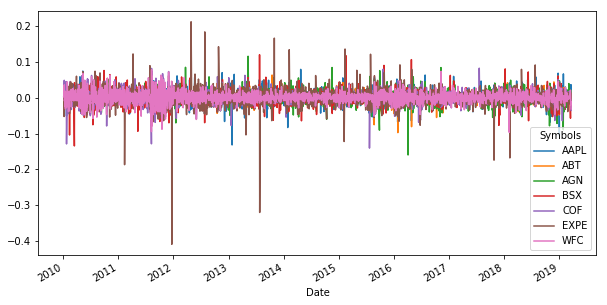

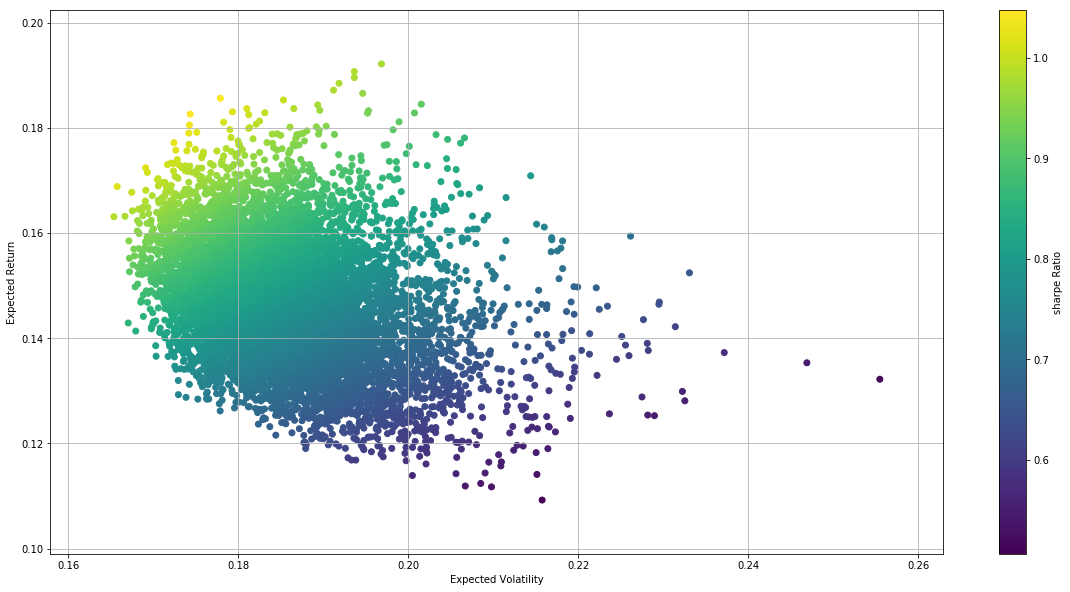

Optimal Portfolio weights:  [0.436 0.444 0.105 0.011 0.    0.004 0.   ]
Optimal Portfolio Exp Returns, Volatility & and Sharpe ratio:  [0.19437301 0.17661449 1.10054958]


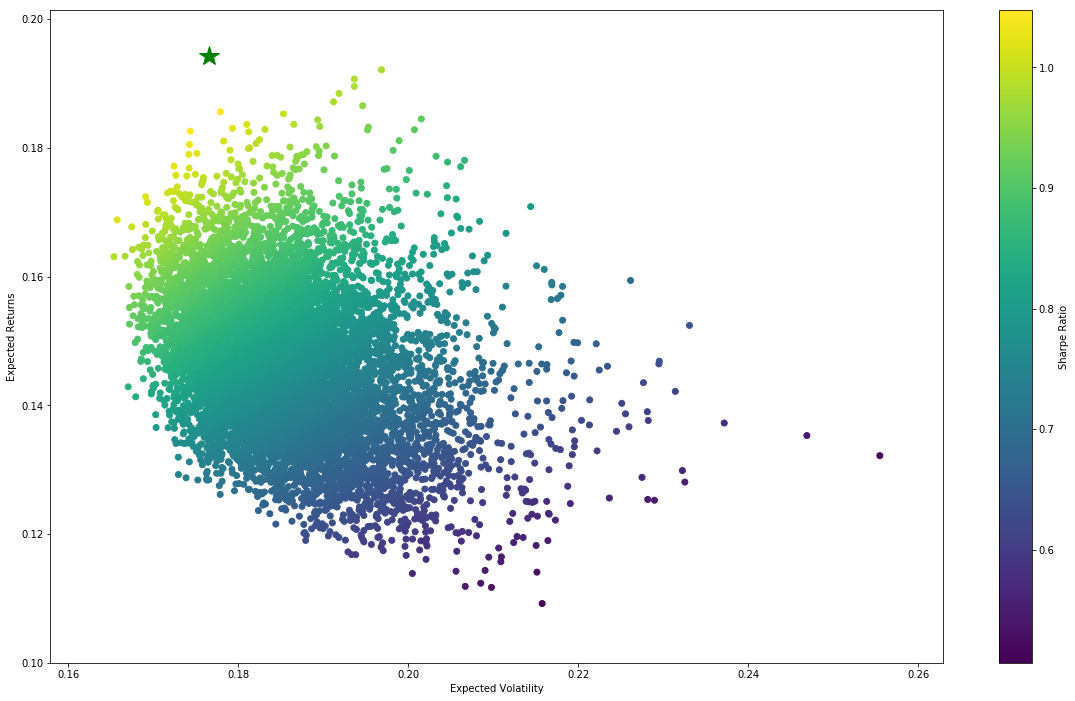

In [349]:
if __name__ == "__main__":
    data = download_data(stocks)
    show_data= (data)
    returns = calculate_returns(data)
    plot_daily_returns(returns)
    show_statistics(returns)
    weights = initialize_weights()
    calculate_portfolio_return(returns, weights)
    calculate_portfolio_variance(returns, weights)
    preturns, pvariances = generate_portfolio(weights, returns)
    plot_portfolios(preturns, pvariances)
    optimum = optimize_portfolio(weights, returns)
    print_optimal_portfolio(optimum, returns)
    show_optimal_portfolio(optimum, returns, preturns, pvariances)   
    